# **EPIC 2 - DATA UNDERSTANDING**

The following flowchart, taken from the Code Institute's course notes on CRISP-DM, were used to guide the data understanding process:

![data-understanding](../docs/images/data-understanding.png)

## Objectives

- Collect and understand the dataset of dog images from Kaggle before moving on to epic 3: data preparation.

### Acceptance Criteria
- The dataset should contain images of various breeds of dogs, as agreed with the client.
- The images should be of sufficient quality and quantity to train the model.

## Tasks
- Download the dataset from Kaggle.
- Explore the dataset to understand its structure and contents.
- Run statistical tests and visualise the dataset.

## Inputs

- Kaggle dataset of dog images.
- Kaggle JSON file for authentication. 

## Outputs

- An image dataset containing sufficient quality and quantity.
- A mean image_shape variable to be used in the next epic: data preparation.
- A list of outliers to be removed from the dataset if necessary.

---

# Set working directory

Check the current working directory:

In [3]:
import os
current_dir = os.getcwd()
print("Current working directory is:", current_dir)

Current working directory is: /Users/gingermale/Documents/repos/PP5/pet-image-classifier/jupyter_notebooks


**If required**, run following cell to move to the parent / project root directory.

In [4]:
os.chdir(os.path.dirname(current_dir)) # Change the current working directory to the parent directory
current_dir = os.getcwd() # Get the new current working directory
print("Changing the working directory to parent folder:", current_dir)

Changing the working directory to parent folder: /Users/gingermale/Documents/repos/PP5/pet-image-classifier


Set dataset, version, input and output directories:

In [5]:
dataset = 'dataset/images'
version = 'v4'
outputs = os.path.join('outputs', version)

if os.path.exists(outputs):
    print(f'Output directory for {version} already exists.')
else:
    os.makedirs(outputs)
    print(f'New output directory for {version} created.')

Output directory for v4 already exists.


#  Collect dataset

First, install kaggle

In [2]:
%pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.3 MB/s eta 0:00:00
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached bleach-6.1.0-py3-none-any.whl.metadata (30 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
Using cached bleach-6.1.0-py3-none-any.whl (162 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.1 MB/s eta 0:00:00a 0:00:01
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105119 sha256=c6a5a1b92553f34e8acb38fb8a2f8c35b531e68f1941ae7ca13ae61d2a546ddf
  Stored in directory: /Users/gingermale/Library/Caches/pip/wheels/89/bc/52/0d140fc172783e1e72e3af4dfc13

Change kaggle configuration directory to current working directory and permission of authentication file.

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd() # set environment variable

Set kaggle dataset and download the dataset to root directory.

In [13]:
KaggleDatasetPath = "amandam1/120-dog-breeds-breed-classification"
DestinationFolder = "dataset"
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Dataset URL: https://www.kaggle.com/datasets/amandam1/120-dog-breeds-breed-classification
License(s): CC0-1.0
100%|████████████████████████████████████████| 740M/740M [05:03<00:00, 1.07MB/s]
100%|████████████████████████████████████████| 740M/740M [05:03<00:00, 2.56MB/s]


Unzip downloaded dataset:

In [14]:
! unzip {DestinationFolder}/120-dog-breeds-breed-classification.zip -d {DestinationFolder} \
    && rm {DestinationFolder}/120-dog-breeds-breed-classification.zip

Archive:  dataset/120-dog-breeds-breed-classification.zip
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_10074.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_10131.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_10621.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_1073.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_10976.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_11140.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_11238.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_11258.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_11337.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_11477.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_1152.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_11696.jpg  
  inflating: dataset/Images/n02085620-Chihuahua/n02085620_11818.jpg  
  inflating: dataset/Images/n02085

# Initial data exploration

The dataset was reviewed with the client, who was satisfied that it contained more than enough dog breeds commonly seen during consults.

The dataset was also visually 'sense-checked' for anomalies and none were found.

## Data Cleaning

The function `find_non_images` checks for non-image files in the dataset.

`os.walk` is used because it is more efficient than os.listdir, especially for large directories.

`PIL` is used to check if the file is an image.

In [31]:
import os
from PIL import Image


def find_non_images(directory):
    '''Find files in a directory that are not images.'''

    non_images = {}
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            try:
                img = Image.open(filepath)
                img.verify()
            except (IOError, SyntaxError) as e:
                # If the directory is not already in the dictionary, add it
                if dirpath not in non_images:
                    non_images[dirpath] = []
                non_images[dirpath].append(filepath)
    return non_images

non_images = find_non_images(dataset)

if not non_images:
    print("Only image files detected.")
else:
    for dirpath, files in non_images.items():
        print(f"Directory: {dirpath}")
        print(f"Number of non-image files: {len(files)}")
        for file in files:
            print(f"Non-image file: {file}")


Directory: dataset/images/n02085620-Chihuahua
Number of non-image files: 1
Non-image file: dataset/images/n02085620-Chihuahua/table.html


 To delete any non-image files detected above, run the `delete_files` function below.

In [32]:
def delete_files(files_dict):
    ''' Delete a list of files.'''

    for dirpath, files in files_dict.items():
        for file in files:
            print(f"Removing file: {file}")
            os.remove(file)

non_images = find_non_images(dataset)
delete_files(non_images)

Removing file: dataset/images/n02085620-Chihuahua/table.html


In [69]:
import os

def rename_directories(base_directory):
    '''Rename each subdirectory in the base directory by removing the first 10 characters.'''

    # Ask for confirmation
    confirm = input(f'Are you sure you want to rename these directories in {base_directory}? (y/n): ')
    if confirm.lower() != 'y':
        print('Operation cancelled.')
        return

    # Get the list of subdirectories
    subdirectories = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]

    for directory in subdirectories:
        old_path = os.path.join(base_directory, directory)
        new_path = os.path.join(base_directory, directory[10:])
        os.rename(old_path, new_path)

    print('Directories renamed.')

rename_directories(dataset)

Directories renamed.


# Set labels

In [20]:
import os
import joblib

labels = [name for name in os.listdir(dataset) if os.path.isdir(os.path.join(dataset, name))]

print(
    f"Project Labels: {labels}"
    )

joblib.dump(value=dataset,
            filename=f"{outputs}/labels.pkl")

Project Labels: ['Australian_terrier', 'toy_poodle', 'Great_Pyrenees', 'Maltese_dog', 'Norwich_terrier', 'whippet', 'Boston_bull', 'Irish_setter', 'Rottweiler', 'kelpie', 'schipperke', 'Leonberg', 'Welsh_springer_spaniel', 'Pomeranian', 'Pekinese', 'Irish_wolfhound', 'Blenheim_spaniel', 'basenji', 'African_hunting_dog', 'komondor', 'Yorkshire_terrier', 'basset', 'Japanese_spaniel', 'standard_schnauzer', 'dhole', 'miniature_pinscher', 'Lhasa', 'Walker_hound', 'Kerry_blue_terrier', 'standard_poodle', 'Saint_Bernard', 'Chihuahua', 'Afghan_hound', 'Newfoundland', 'black-and-tan_coonhound', 'pug', 'Scottish_deerhound', 'cairn', 'malamute', 'beagle', 'vizsla', 'collie', 'Italian_greyhound', 'West_Highland_white_terrier', 'Brittany_spaniel', 'English_springer', 'affenpinscher', 'Doberman', 'silky_terrier', 'Pembroke', 'Weimaraner', 'papillon', 'Norwegian_elkhound', 'Sussex_spaniel', 'soft-coated_wheaten_terrier', 'Shih-Tzu', 'Ibizan_hound', 'cocker_spaniel', 'flat-coated_retriever', 'American

['outputs/v4/labels.pkl']

---

# Visualize the dataset

## Check quantity of images per breed

First, the dataset was visualized to understand the distribution of images across the different breeds. The following code uses the [matplotlib library](https://matplotlib.org/).

In [27]:
%pip install matplotlib pillow seaborn pandas

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


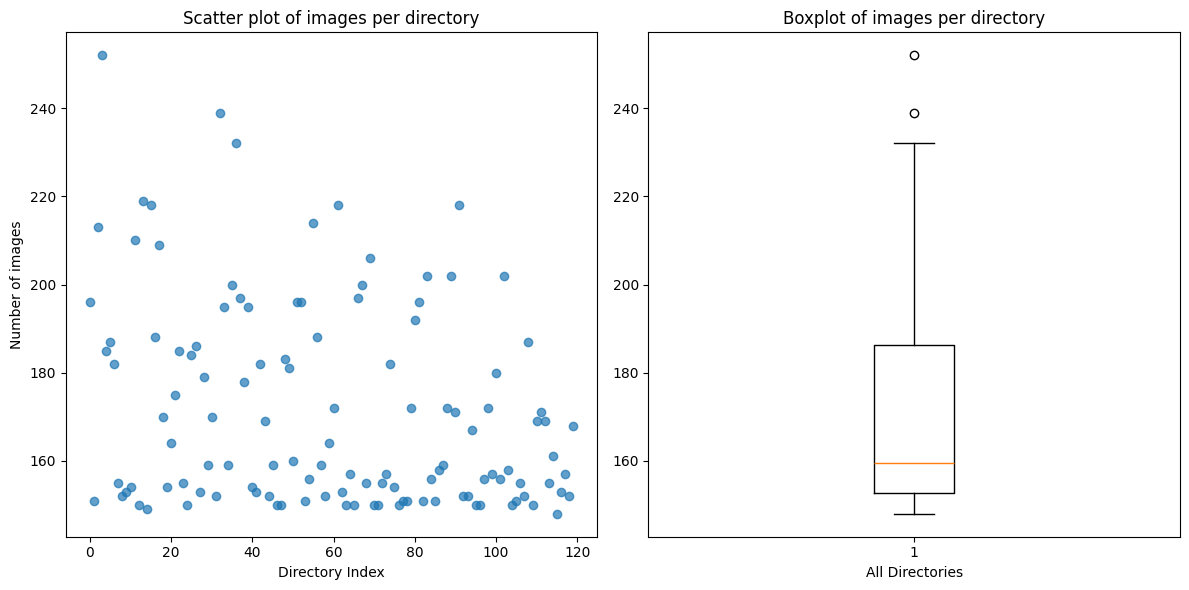

Outlier directories: ['Maltese_dog', 'Afghan_hound']


In [22]:
import numpy as np
import matplotlib.pyplot as plt


def visualize_dataset(base_directory):
    '''Visualize the number of images in each subdirectory of the base directory.'''

    # Get the list of subdirectories
    subdirectories = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]

    # Count the number of images in each subdirectory
    counts = [len(os.listdir(os.path.join(base_directory, d))) for d in subdirectories]

    # Create a scatter plot with indices instead of directory names
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(range(len(subdirectories)), counts, alpha=0.7)
    plt.title('Scatter plot of images per directory')
    plt.xlabel('Directory Index')
    plt.ylabel('Number of images')

    # Create a boxplot of the counts
    plt.subplot(1, 2, 2)
    plt.boxplot(counts)
    plt.title('Boxplot of images per directory')
    plt.xlabel('All Directories')

    # Save and show the plots
    plt.tight_layout()
    plt.savefig(f'{outputs}/outlier_plots.png')
    plt.show()
    
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(counts, 25)
    Q3 = np.percentile(counts, 75)
    IQR = Q3 - Q1

    # Identify the outliers
    outlier_indices = [i for i, count in enumerate(counts) if count < Q1 - 1.5*IQR or count > Q3 + 1.5*IQR]
    outlier_directories = [subdirectories[i] for i in outlier_indices]

    return outlier_directories

outlier_directories = visualize_dataset(dataset)
print(f"Outlier directories: {outlier_directories}")

These plots show the number of images per breed in the dataset. The boxplot on the right shows the min, max, median, and quartiles of the number of images per breed, as well as any outliers. The outliers are returned by the `visualize_dataset` function.

Depending on the spread of data and performance of the model, these outliers can be removed using the `remove_outliers` function at the next stage: data preparation. For now, the outliers are stored in a list for reference.

In [13]:
import joblib

joblib.dump(value=outlier_directories,
            filename=f"{outputs}/outlier_directories.pkl")

['outputs/v4/outlier_directories.pkl']

## Check quality (resolution) of images

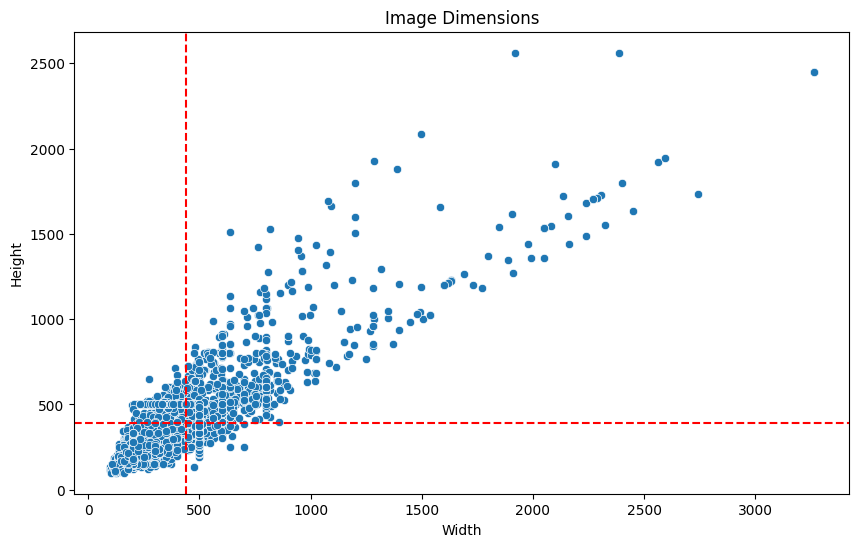

The mean width x height is 440 x 390, which will be used for resizing all images for training.


In [16]:
import pandas as pd
import seaborn as sns
from PIL import Image

def visualize_image_resolutions(directory):
    '''Visualize the resolutions of images in a directory.'''
    image_resolutions = []
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(dirpath, filename)
                with Image.open(file_path) as img:
                    width, height = img.size
                    image_resolutions.append((width, height))

    # Convert to DataFrame for easier plotting
    df = pd.DataFrame(image_resolutions, columns=['Width', 'Height'])

    # Calculate mean width and height
    mean_width = int(round(df['Width'].mean(), -1))
    mean_height = int(round(df['Height'].mean(), -1))

    # Plot image dimensions
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Width', y='Height', data=df)
    plt.axvline(x=mean_width, color='r', linestyle='--')
    plt.axhline(y=mean_height, color='r', linestyle='--')
    plt.title('Image Dimensions')
    plt.show()

    print(f"The mean width x height is {mean_width} x {mean_height}, which will be used for resizing all images for training.")

    image_shape = (mean_width, mean_height, 3)
    return image_shape

image_shape = visualize_image_resolutions(dataset)

In [17]:
import joblib

joblib.dump(value=image_shape ,
            filename=f"{outputs}/image_shape.pkl")

['outputs/v4/image_shape.pkl']

The minimum resolution is 105 x 100 and is found in the image dataset/images/Rhodesian_ridgeback/n02087394_9695.jpg


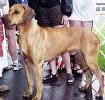

In [108]:
from PIL import Image
from IPython.display import display

def print_min_resolution(directory):
    '''Print the image with the minimum resolution in a directory.'''
    min_resolution = None
    min_dimensions = None
    min_file = None
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(dirpath, filename)
                with Image.open(file_path) as img:
                    width, height = img.size
                    resolution = width * height
                    if min_resolution is None or resolution < min_resolution:
                        min_resolution = resolution
                        min_dimensions = (width, height)
                        min_file = file_path

    print(f"The minimum resolution is {min_dimensions[0]} x {min_dimensions[1]} and is found in the image {min_file}")

    # Display the image with the minimum resolution
    with Image.open(min_file) as img:
        display(img)

print_min_resolution(dataset)

If the image above is recognisable as a dog from the breed name, the dataset is ready for the next stage: data preparation.

# Conclusions and Next Steps

**Quality**

The image with the lowest resolution (105x100 pixels) is visually recognisable, so the dataset is deemed to have sufficient quality to train the model. Before training the model, the images will be resized to the image_shape to improve the model's performance.

**Quantity**

The above findings shows variation in numbers of images per breed. Outliers may introduce bias, and can be removed at a later stage if the model's performance shows this.

Later, during the modelling step, data augmentation will be used to increase the number of images for each breed.

The next step is to prepare the dataset for training the model in epic 3: data preparation.